### Intro a redes convolucionales
 las redes neuronales convolucionales se suponen que tratan de simular la corteza cerebral.

In [1]:
#Primera red convolusionar
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D , Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


1. Hacemos un análisis exploratorio para entender los datos

In [3]:
train_images.shape #60000 imagenes de 28 * 28

(60000, 28, 28)

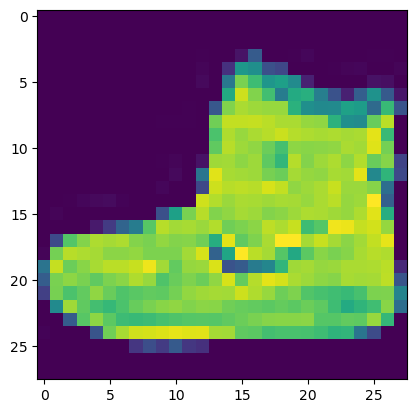

In [4]:
plt.imshow(train_images[0])
# visualizamos la primera imagen del dataset

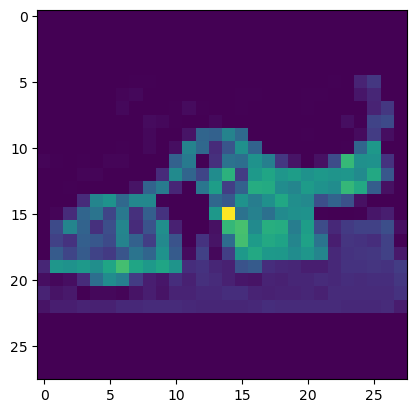

In [5]:
plt.imshow(train_images[986])

Podemos ver entonces que este dataset es de imagenes de ropa

2. Estandarizaremos los valores para poder tenerlos en un mismo rango, de 0 a 1 y evitar futuros sesgos

In [6]:
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255

In [7]:
#haremos un reshape del dataset, para que tenga en este caso solo 1 canal (relacionado a la imagen)
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images= test_images.reshape(test_images.shape[0],28,28,1)


Este "to.categorical" lo que hace es que me logra crear una clasificación del arreglo con 0 y 1, de la cantidad de posibles opciones que puedo tener

In [8]:
train_labels[0]

9

Por tanto nuestro arreglo cambiará asi:

In [9]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
#el 10, es porque sabemos de la documentación del dataset que tenemos 10 posibles opciones
test_labels= tf.keras.utils.to_categorical(test_labels,10)

In [10]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Entonces vemos que el "to_categorical" me creó este arreglo donde solo es 1 en la posición que corresponde

### Modelo de datos

In [11]:
model= tf.keras.Sequential()
#Primero agregamos la capa de convolución
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3)) #Capa para evitar overfitting
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
#La siguiente capa "aplanará los datos de la neurona"
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

### Entrenando el modelo

In [12]:
#compilando el modelo
model.compile(loss = "categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [13]:
model.fit(train_images,train_labels, batch_size=64,
         epochs=30)

Epoch 1/30


2023-03-25 21:20:39.441598: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 14s 5ms/step - loss: 0.5567 - accuracy: 0.7979
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3803 - accuracy: 0.8620
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3374 - accuracy: 0.8795
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3140 - accuracy: 0.8881
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3031 - accuracy: 0.8927
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2935 - accuracy: 0.8957
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2895 - accuracy: 0.8971
Epoch 8/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2855 - accuracy: 0.8983
Epoch 9/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2806 - accuracy: 0.9016
Epoch 10/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2776 - accuracy: 0.9026
Epoch 11/

In [14]:
model.evaluate(test_images,test_labels,
              verbose=0)

[0.2544901967048645, 0.9164000153541565]

Vemos que tenemos un 91% de accuracy en el modelo